In [582]:
#%matploplib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Fuente de informacion repositorio ANID proyectos postulados 2016 a 2020
Macrozona Norte

In [583]:
urlPostulados = 'https://raw.githubusercontent.com/ANID-GITHUB/Postulaciones/main/POSTULACIONES_2016_2020.csv'

dfPostulados = pd.read_csv(urlPostulados,sep=';',header=0,encoding = 'UTF-8',warn_bad_lines=False, error_bad_lines = False,lineterminator='\n') # encoding = "ISO-8859-1"

Cambio de nombre de columnas

In [584]:
dfPostulados = dfPostulados.rename(columns=
    {
    'NOMBRE DEL CONCURSO'           : 'NOMBRE_DEL_CONCURSO',
    ' MONTO TOTAL ADJUDICADO (M$) ' : 'MONTO_ADJUDICADO',
    'REGION DE EJECUCION'           : 'REGION',
    'TIPO DE BENEFICIARIO'          : 'TIPO_DE_BENEFICIARIO',
    'TIPO DE INSTITUCION'           : 'TIPO_DE_INSTITUCION',
    'AÑO DE FALLO'                  : 'AÑO',
    'MACRO ZONA\r'                  : 'MACROZONA',
    'ESTADO_RESOLUCION_CONCURSO'    : 'ESTADO_RESOLUCION'
    })

print('****************** POSTULADOS ******************')
print(dfPostulados.columns.tolist())



****************** POSTULADOS ******************
['CODIGO DEL PROYECTO', 'SUBDIRECCION', 'PROGRAMA', 'INSTRUMENTO', 'NOMBRE_DEL_CONCURSO', 'MONTO_ADJUDICADO', 'ESTADO_RESOLUCION', 'DISCIPLINA OECD', 'REGION', 'TIPO_DE_BENEFICIARIO', 'TIPO_DE_INSTITUCION', 'SEXO', 'AÑO', 'MACROZONA']


Construccion de dataframe por macrozona

In [585]:
dfNorte = dfPostulados[['MACROZONA','REGION','TIPO_DE_INSTITUCION','TIPO_DE_BENEFICIARIO','AÑO', 'PROGRAMA', 'INSTRUMENTO','NOMBRE_DEL_CONCURSO','MONTO_ADJUDICADO','ESTADO_RESOLUCION']]
dfNorte = dfNorte.sort_values(by=['REGION','AÑO'])

dfNorte['MACROZONA'] = dfNorte['MACROZONA'].str.replace('\r','')
dfNorte['REGION'] = dfNorte['REGION'].str.replace('\r','')

dfNorte.to_excel('../output/proyectos_anid_postulados_MZN.xlsx')

Filtros para dataframe

In [586]:
AÑO = 2010

dfNorte = dfNorte[dfNorte.MACROZONA             == "NORTE"]
#dfNorte = dfNorte[dfNorte.PROGRAMA              == "FONDEQUIP"]
dfNorte = dfNorte[dfNorte.TIPO_DE_INSTITUCION   == "UNIVERSIDAD"]
dfNorte = dfNorte[dfNorte.AÑO                   >= AÑO]

Postulaciones por región '01. TARAPACA' '02. ANTOFAGASTA' '03. ATACAMA' '15. ARICA Y PARINACOTA'

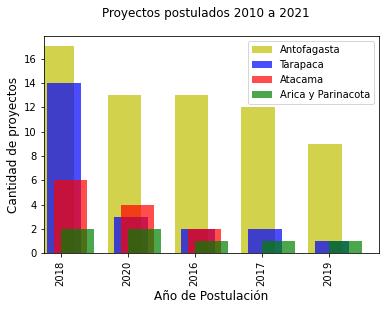

In [587]:
dfResult = dfNorte[['AÑO']].groupby([dfNorte.REGION,dfNorte.AÑO,dfNorte.ESTADO_RESOLUCION], dropna=False).count()

dfAntofagasta['AÑO'].value_counts().plot.bar        (label = 'Antofagasta'        ,color='y',position = 0.6,alpha=0.7)
dfTarapaca['AÑO'].value_counts().plot.bar           (label = 'Tarapaca'           ,color='b',position = 0.4,alpha=0.7)
dfAtacama['AÑO'].value_counts().plot.bar            (label = 'Atacama'            ,color='r',position = 0.2,alpha=0.7)
dfAricaParinacota['AÑO'].value_counts().plot.bar    (label = 'Arica y Parinacota' ,color='g',position = 0.0,alpha=0.7)

plt.suptitle('Proyectos postulados 2010 a 2021')
plt.ylabel('Cantidad de proyectos',fontsize=12)
plt.xlabel('Año de Postulación',fontsize=12)
plt.legend()

plt.show()


In [588]:
dfResult = dfNorte[['AÑO']].groupby([dfNorte.REGION,dfNorte.AÑO,dfNorte.ESTADO_RESOLUCION], dropna=False).count()

#print(dfResult)

dfAntofagasta['AÑO'].plot.hist        (label = 'Antofagasta'        ,color='y',alpha=0.7)
dfTarapaca['AÑO'].plot.hist           (label = 'Tarapaca'           ,color='b',alpha=0.7)
dfAtacama['AÑO'].plot.hist            (label = 'Atacama'            ,color='r',alpha=0.7)
dfAricaParinacota['AÑO'].plot.hist    (label = 'Arica y Parinacota' ,color='g',alpha=0.7)


#ADJUDICADO
plt.suptitle('Proyectos postulados 2010 a 2021')
plt.ylabel('Cantidad de proyectos',fontsize=12)
plt.xlabel('Año de Postulación',fontsize=12)
plt.legend()

plt.show()


AttributeError: 'DataFrame' object has no attribute 'ESTADO_RESOLUCION_CONCURSO'